## Supervised Machine Learning: Regression
### Course Project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import boxcox

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, 
                                   PolynomialFeatures)

from scipy.special import inv_boxcox

from sklearn.model_selection import train_test_split


import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [2]:
# Getting the dataset

data = pd.read_csv('Stock_Exchange_KSE_100(Pakistan).csv')

print(data.shape)


(3221, 7)


In [3]:
data.head(20)

,Date,Open,High,Low,Close,Change,Volume
0,23-Feb-21,"31,722.16","31,800.90","31,597.31","31,626.19",-21.38,"718,191,025"
1,22-Feb-21,"31,874.78","31,958.58","31,612.55","31,647.57",-203.61,"721,952,658"
2,19-Feb-21,"31,748.75","31,904.30","31,749.43","31,851.18",91.36,"694,795,084"
3,18-Feb-21,"32,049.85","32,104.67","31,745.72","31,759.82",-288.86,"577,837,595"
4,17-Feb-21,"32,166.21","32,390.77","32,044.01","32,048.68",-93.15,"701,658,181"
5,16-Feb-21,"31,898.51","32,155.42","31,891.80","32,141.83",250.03,"514,044,525"
6,15-Feb-21,"31,695.01","31,959.00","31,552.69","31,891.80",339.11,"486,340,423"
7,12-Feb-21,"31,703.25","31,819.14","31,517.21","31,552.69",-151.98,"442,547,019"
8,11-Feb-21,"32,121.31","32,255.15","31,653.40","31,704.67",-410.7,"1,124,724,205"
9,10-Feb-21,"32,186.99","32,234.98","31,949.20","32,115.37",-51.32,"1,011,825,950"


In [4]:
df=data

In [5]:
df.head()

,Date,Open,High,Low,Close,Change,Volume
0,23-Feb-21,"31,722.16","31,800.90","31,597.31","31,626.19",-21.38,"718,191,025"
1,22-Feb-21,"31,874.78","31,958.58","31,612.55","31,647.57",-203.61,"721,952,658"
2,19-Feb-21,"31,748.75","31,904.30","31,749.43","31,851.18",91.36,"694,795,084"
3,18-Feb-21,"32,049.85","32,104.67","31,745.72","31,759.82",-288.86,"577,837,595"
4,17-Feb-21,"32,166.21","32,390.77","32,044.01","32,048.68",-93.15,"701,658,181"


In [6]:
# Removing the symbols in the Data

df.replace(',','', regex=True, inplace=True)

In [7]:
df.head()

,Date,Open,High,Low,Close,Change,Volume
0,23-Feb-21,31722.16,31800.90,31597.31,31626.19,-21.38,718191025
1,22-Feb-21,31874.78,31958.58,31612.55,31647.57,-203.61,721952658
2,19-Feb-21,31748.75,31904.30,31749.43,31851.18,91.36,694795084
3,18-Feb-21,32049.85,32104.67,31745.72,31759.82,-288.86,577837595
4,17-Feb-21,32166.21,32390.77,32044.01,32048.68,-93.15,701658181


In [8]:
data.count()

Date      3221
Open      3221
High      3221
Low       3221
Close     3221
Change    3221
Volume    3221
dtype: int64

In [9]:
data.describe()

,Date,Open,High,Low,Close,Change,Volume
count,3221,3221,3221,3221,3221,3221,3221
unique,3221,3213,3215,3211,3209,3104,3220
top,14-May-09,29929.00,7935.15,6639.00,6639.25,0,302831072
freq,1,2,2,3,3,5,2


In [10]:
data.dtypes

Date      object
Open      object
High      object
Low       object
Close     object
Change    object
Volume    object
dtype: object

In [11]:
data.shape

(3221, 7)

In [12]:
#  Formimng the X and Y dataframes

feature_cols = [x for x in df.columns if x != 'Volume']
X = df[feature_cols]
y = df['Volume']



# Dropping the date coulum from dataframe 
X=X.drop('Date', axis=1)

In [13]:
#  Converting Datatype into float

X = X.astype(float)
y = y.astype(float)

In [14]:
X.head()

,Open,High,Low,Close,Change
0,31722.16,31800.90,31597.31,31626.19,-21.38
1,31874.78,31958.58,31612.55,31647.57,-203.61
2,31748.75,31904.30,31749.43,31851.18,91.36
3,32049.85,32104.67,31745.72,31759.82,-288.86
4,32166.21,32390.77,32044.01,32048.68,-93.15


In [15]:
# Making test and train sets of data

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, random_state=42)


In [16]:
# Applying Linear Regaression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

LR = LinearRegression()

# Storage for error values
error_df = list()

# Data that have not been one-hot encoded
LR = LR.fit(X_train, y_train)
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)

error_df.append(pd.Series({'train': mean_squared_error(y_train, y_train_pred),
                           'test' : mean_squared_error(y_test,  y_test_pred)},
                           name='Mean Square Error'))


error_df = pd.concat(error_df, axis=1)
error_df

,Mean Square Error
train,1.417859e+16
test,1.368677e+16


For Linear Regression the MSE is nearly same for training and testing set

In [17]:
pd.options.mode.chained_assignment = None

In [18]:
X_train

,Open,High,Low,Close,Change
767,31240.71,31489.82,31022.99,31229.84,118.06
787,28238.42,28452.44,28135.45,28367.24,156.64
2810,6573.42,6644.86,6386.29,6506.57,-71.18
1289,23074.01,23084.37,22918.81,22918.81,-139.75
930,35503.17,35924.62,35503.17,35863.66,431.54
...,...,...,...,...,...
1095,27484.44,27569.37,27396.17,27526.47,95.09
1130,26383.18,26499.56,26264.00,26292.27,-79.02
1294,22813.40,22931.44,22811.41,22866.45,77.91
860,29665.88,29752.41,29246.40,29419.07,-264.31


In [19]:
X_train.dtypes

Open      float64
High      float64
Low       float64
Close     float64
Change    float64
dtype: object

In [20]:
# Seeing the effect of scaling 

from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler


scalers = {'standard': StandardScaler(),
           'minmax': MinMaxScaler(),
           'maxabs': MaxAbsScaler()}


training_test_sets = {
    'not_encoded': (X_train, y_train, X_test, y_test)}


# Get the list of float columns, and the float data
# so that we don't scale something we already scaled. 
# We're supposed to scale the original data each time

mask = X_train.dtypes == np.float
float_columns = X_train.columns[mask]

# initialize model
LR = LinearRegression()

# iterate over all possible combinations and get the errors
errors = {}
for encoding_label, (_X_train, _y_train, _X_test, _y_test) in training_test_sets.items():
    for scaler_label, scaler in scalers.items():
        trainingset = _X_train.copy()  # copy because we dont want to scale this more than once.
        testset = _X_test.copy()
        trainingset[float_columns] = scaler.fit_transform(trainingset[float_columns])
        testset[float_columns] = scaler.transform(testset[float_columns])
        LR.fit(trainingset, _y_train)
        predictions = LR.predict(testset)
        key = encoding_label + ' - ' + scaler_label + 'scaling'
        errors[key] = mean_squared_error(_y_test, predictions)

errors = pd.Series(errors)
print(errors.to_string())
print('-' * 80)
for key, error_val in errors.items():
    print(key, error_val)

not_encoded - standardscaling    1.368677e+16
not_encoded - minmaxscaling      1.368677e+16
not_encoded - maxabsscaling      1.368677e+16
--------------------------------------------------------------------------------
not_encoded - standardscaling 1.3686766236454764e+16
not_encoded - minmaxscaling 1.3686766236454772e+16
not_encoded - maxabsscaling 1.3686766236454758e+16


No big difference by using transformation so it is not required

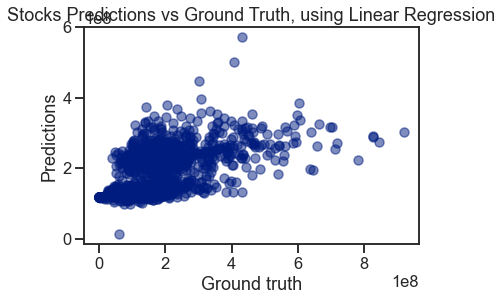

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = plt.axes()
# we are going to use y_test, y_test_pred
ax.scatter(y_test, y_test_pred, alpha=.5)

ax.set(xlabel='Ground truth', 
       ylabel='Predictions',
       title='Stocks Predictions vs Ground Truth, using Linear Regression');

### Using Kfolds

In [22]:
kf = KFold(shuffle=True, random_state=72018, n_splits=3)

In [23]:

for train_index, test_index in kf.split(X):
    print("Train index:", train_index[:10], len(train_index))
    print("Test index:",test_index[:10], len(test_index))
    print('')

Train index: [ 0  2  3  4  5  7  8 10 11 12] 2147
Test index: [ 1  6  9 15 17 18 21 22 23 30] 1074

Train index: [ 0  1  4  6  7  8  9 10 11 12] 2147
Test index: [ 2  3  5 14 16 19 20 24 26 27] 1074

Train index: [ 1  2  3  5  6  9 14 15 16 17] 2148
Test index: [ 0  4  7  8 10 11 12 13 25 28] 1073



In [24]:
#from sklearn.metrics import r2_score, mean_squared_error

scores = []
lr = LinearRegression()

for train_index, test_index in kf.split(X):
    X_train, X_test, y_train, y_test = (X.iloc[train_index, :], 
                                        X.iloc[test_index, :], 
                                        y[train_index], 
                                        y[test_index])
    
    lr.fit(X_train, y_train)
        
    y_pred = lr.predict(X_test)

    score = r2_score(y_test.values, y_pred)
    
    scores.append(score)
    
scores

[0.24403273215319998, 0.20678344963496753, 0.21933033348969955]

Using Kfold random sampling shows that mean square error is same so we can use any train and test set  from dataframe

In [25]:
scores = []

lr = LinearRegression()
s = StandardScaler()

for train_index, test_index in kf.split(X):
    X_train, X_test, y_train, y_test = (X.iloc[train_index, :], 
                                        X.iloc[test_index, :], 
                                        y[train_index], 
                                        y[test_index])
    
    X_train_s = s.fit_transform(X_train)
    
    lr.fit(X_train_s, y_train)
    
    X_test_s = s.transform(X_test)
    
    y_pred = lr.predict(X_test_s)

    score = r2_score(y_test.values, y_pred)
    
    scores.append(score)
    
scores

[0.24403273215319998, 0.20678344963496842, 0.21933033348969977]

Applying statndar scalar transform on Linear regression on the random train test sets shows that mean square error is same

### Using Combine multiple processing steps into a Pipeline and using cross_val_predict

In [26]:
s = StandardScaler()
lr = LinearRegression()

In [27]:
estimator = Pipeline([("scaler", s),
                      ("regression", lr)])

In [28]:
kf

KFold(n_splits=3, random_state=72018, shuffle=True)

In [29]:
predictions = cross_val_predict(estimator, X, y, cv=kf)

In [30]:
r2_score(y, predictions)

0.22443001302912113

In [31]:
np.mean(scores) # almost identical!

0.2233821717592894

## Hyperparameter tuning

In [32]:
alphas = np.geomspace(1e-9, 1e0, num=10)
alphas

array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
       1.e-01, 1.e+00])

In [33]:
# Using Lasso Regression

scores = []
coefs = []
for alpha in alphas:
    las = Lasso(alpha=alpha, max_iter=100000)
    
    estimator = Pipeline([
        ("scaler", s),
        ("lasso_regression", las)])

    predictions = cross_val_predict(estimator, X, y, cv = kf)
    
    score = r2_score(y, predictions)
    
    scores.append(score)

C:\Users\Amin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.5127163807835048e+19, tolerance: 3877809663550336.5
  model = cd_fast.enet_coordinate_descent(
C:\Users\Amin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.579839154574192e+19, tolerance: 4137817190372711.0
  model = cd_fast.enet_coordinate_descent(
C:\Users\Amin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4198085229649177e+19, tolerance: 3698891959867915.0
  model = cd_fast.enet_coordinate_descent(
C:\Users\Amin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: Conv

C:\Users\Amin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.557348384506723e+19, tolerance: 4137817190372711.0
  model = cd_fast.enet_coordinate_descent(
C:\Users\Amin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4049603419113396e+19, tolerance: 3698891959867915.0
  model = cd_fast.enet_coordinate_descent(


In [34]:
list(zip(alphas,scores))

[(1e-09, 0.22446551973902773),
 (1e-08, 0.22446551973902695),
 (1e-07, 0.22446551973902806),
 (1e-06, 0.22446551973909867),
 (1e-05, 0.22446551973980367),
 (0.0001, 0.22446551974677964),
 (0.001, 0.2244655198164629),
 (0.01, 0.22446552051332114),
 (0.1, 0.22446552748201365),
 (1.0, 0.22446559715736347)]

In [35]:
Lasso(alpha=1e-6).fit(X, y).coef_

C:\Users\Amin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.336346396518895e+19, tolerance: 5858066507907808.0
  model = cd_fast.enet_coordinate_descent(


array([ -6141.37943087,  20152.53018621, -10095.04435393,   1992.87612549,
        56621.63939419])

In [36]:
Lasso(alpha=1.0).fit(X, y).coef_

C:\Users\Amin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.3363463921408287e+19, tolerance: 5858066507907808.0
  model = cd_fast.enet_coordinate_descent(


array([ -6141.37942541,  20152.53017778, -10095.04433239,   1992.87610708,
        56621.63938639])

Text(0.5, 1.0, 'Lasso Regression')

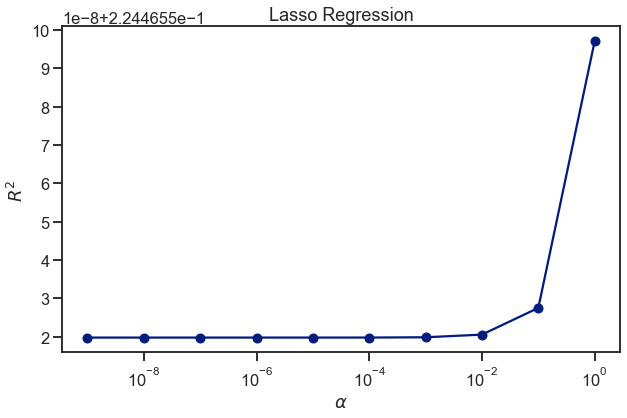

In [37]:
plt.figure(figsize=(10,6))
plt.semilogx(alphas, scores, '-o')
plt.xlabel('$\\alpha$')
plt.ylabel('$R^2$');
plt.title("Lasso Regression")

In [ ]:
# Using Lasso with ploynomial degree 3 and scaling

pf = PolynomialFeatures(degree=3)

scores = []
alphas = np.geomspace(0.06, 6.0, 20)
for alpha in alphas:
    las = Lasso(alpha=alpha, max_iter=100000)
    
    estimator = Pipeline([
        ("scaler", s),
        ("make_higher_degree", pf),
        ("lasso_regression", las)])

    predictions = cross_val_predict(estimator, X, y, cv = kf)
    
    score = r2_score(y, predictions)
    
    scores.append(score)
    

C:\Users\Amin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4216769624768008e+19, tolerance: 3877809663550336.5
  model = cd_fast.enet_coordinate_descent(
C:\Users\Amin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.483559266330553e+19, tolerance: 4137817190372711.0
  model = cd_fast.enet_coordinate_descent(
C:\Users\Amin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.325129098328944e+19, tolerance: 3698891959867915.0
  model = cd_fast.enet_coordinate_descent(
C:\Users\Amin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: Conve

In [ ]:
alphas

In [ ]:
scores

In [ ]:
plt.semilogx(alphas, scores);

plt.xlabel('Alpha')
plt.ylabel('Scores R^2');
plt.title("Lasso Regression with polynomial degree=3")

In [ ]:
# Once we have found the hyperparameter (alpha~1e-2=0.01)
# make the model and train it on ALL the data
# Then release it into the wild .....
best_estimator = Pipeline([
                    ("scaler", s),
                    ("make_higher_degree", PolynomialFeatures(degree=2)),
                    ("lasso_regression", Lasso(alpha=0.03))])

best_estimator.fit(X, y)
best_estimator.score(X, y)

In [ ]:
best_estimator.named_steps["lasso_regression"].coef_

In [ ]:
pf = PolynomialFeatures(degree=2)
alphas = np.geomspace(4, 20, 20)
scores=[]
for alpha in alphas:
    ridge = Ridge(alpha=alpha, max_iter=100000)

    estimator = Pipeline([
        ("scaler", s),
        ("polynomial_features", pf),
        ("ridge_regression", ridge)])

    predictions = cross_val_predict(estimator, X, y, cv = kf)
    score = r2_score(y, predictions)
    scores.append(score)

plt.plot(alphas, scores)
plt.xlabel('Alpha')
plt.ylabel('Scores    R^2');
plt.title("Ridge Regression")

In [ ]:
# Once we have found the hyperparameter (alpha~1e-2=0.01)
# make the model and train it on ALL the data
# Then release it into the wild .....
best_estimator = Pipeline([
                    ("scaler", s),
                    ("make_higher_degree", PolynomialFeatures(degree=2)),
                    ("lasso_regression", Lasso(alpha=0.03))])

best_estimator.fit(X, y)
best_estimator.score(X, y)

In [ ]:
best_estimator.named_steps["make_higher_degree"].get_feature_names(input_features=X.columns)

In [ ]:
best_estimator.named_steps["lasso_regression"].coef_

In [ ]:
df_importances = pd.DataFrame(zip(best_estimator.named_steps["make_higher_degree"].get_feature_names(input_features=X.columns),
                 best_estimator.named_steps["lasso_regression"].coef_,
))

In [ ]:
df_importances.head()

In [ ]:
col_names_dict = dict(zip(list(range(len(X.columns.values))), X.columns.values))

In [ ]:
col_names_dict

In [ ]:
df_importances.sort_values(by=1)

In [ ]:
# Once we have found the hyperparameter (alpha~1e-2=0.01)
# make the model and train it on ALL the data
# Then release it into the wild .....
best_estimator = Pipeline([
                    ("scaler", s),
                    ("make_higher_degree", PolynomialFeatures(degree=2)),
                    ("ridge_regression", Ridge(alpha=0.03))])

best_estimator.fit(X, y)
best_estimator.score(X, y)

In [ ]:
df_importances_r = pd.DataFrame(zip(best_estimator.named_steps["make_higher_degree"].get_feature_names(input_features=X.columns),
                 best_estimator.named_steps["ridge_regression"].coef_,
))

In [ ]:
col_names_dict_r = dict(zip(list(range(len(X.columns.values))), X.columns.values))

In [ ]:
df_importances_r.sort_values(by=1)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Same estimator as before
estimator = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("ridge_regression", Ridge())])

params = {
    'polynomial_features__degree': [1, 2, 3, 4, 5],
    'ridge_regression__alpha': np.geomspace(4, 20, 30)
}

grid = GridSearchCV(estimator, params, cv=kf)

In [ ]:
grid.fit(X, y)

In [ ]:
grid.best_score_, grid.best_params_

In [ ]:
y_predict = grid.predict(X)

In [ ]:
r2_score(y, y_predict)

In [ ]:
# Notice that "grid" is a fit object!
# We can use grid.predict(X_test) to get brand new predictions!
grid.best_estimator_.named_steps['ridge_regression'].coef_

In [ ]:
pd.DataFrame(grid.cv_results_)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Same estimator as before
estimator = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("lasso_regression", Lasso())])

params = {
    'polynomial_features__degree': [1, 2, 3, 4, 5],
    'lasso_regression__alpha': np.geomspace(0.06, 6.0, 20)
}

grid = GridSearchCV(estimator, params, cv=kf)

In [ ]:
grid.fit(X, y)

In [ ]:
grid.best_score_, grid.best_params_

In [ ]:
y_predict = grid.predict(X)

In [ ]:
r2_score(y, y_predict)

In [ ]:
# Notice that "grid" is a fit object!
# We can use grid.predict(X_test) to get brand new predictions!
grid.best_estimator_.named_steps['lasso_regression'].coef_

In [ ]:
pd.DataFrame(grid.cv_results_) 

### NO SCALING

In [ ]:
from sklearn.metrics import mean_squared_error


def rmse(ytrue, ypredicted):
    return np.sqrt(mean_squared_error(ytrue, ypredicted))

In [ ]:
from sklearn.linear_model import LinearRegression

linearRegression = LinearRegression().fit(X_train, y_train)

linearRegression_rmse = rmse(y_test, linearRegression.predict(X_test))

print(linearRegression_rmse)

In [ ]:
f = plt.figure(figsize=(6,6))
ax = plt.axes()

ax.plot(y_test, linearRegression.predict(X_test), 
         marker='o', ls='', ms=3.0)

lim = (0, y_test.max())

ax.set(xlabel='Actual Volume', 
       ylabel='Predicted Volume', 
       xlim=lim,
       ylim=lim,
       title='Linear Regression Results');

In [ ]:
from sklearn.linear_model import RidgeCV

from sklearn.linear_model import Ridge, Lasso

alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]

ridgeCV = RidgeCV(alphas=alphas, 
                  cv=kf).fit(X_train, y_train)

ridgeCV_rmse = rmse(y_test, ridgeCV.predict(X_test))

print(ridgeCV.alpha_, ridgeCV_rmse)

In [ ]:
f = plt.figure(figsize=(6,6))
ax = plt.axes()

ax.plot(y_test, ridgeCV.predict(X_test), 
         marker='o', ls='', ms=3.0)

lim = (0, y_test.max())

ax.set(xlabel='Actual Volume', 
       ylabel='Predicted Volume', 
       xlim=lim,
       ylim=lim,
       title='Ridge Regression Results');

In [ ]:
from sklearn.linear_model import LassoCV

alphas2 = np.array([1e-5, 5e-5, 0.0001, 0.0005])

lassoCV = LassoCV(alphas=alphas2,
                  max_iter=5e4,
                  cv=kf).fit(X_train, y_train)

lassoCV_rmse = rmse(y_test, lassoCV.predict(X_test))

print(lassoCV.alpha_, lassoCV_rmse)  # Lasso is slower



In [ ]:
f = plt.figure(figsize=(6,6))
ax = plt.axes()

ax.plot(y_test, lassoCV.predict(X_test), 
         marker='o', ls='', ms=3.0)

lim = (0, y_test.max())

ax.set(xlabel='Actual Volume', 
       ylabel='Predicted Volume', 
       xlim=lim,
       ylim=lim,
       title='Lasso Regression Results');

In [ ]:
from sklearn.linear_model import ElasticNetCV

l1_ratios = np.linspace(0.1, 0.9, 9)

elasticNetCV = ElasticNetCV(alphas=alphas2, 
                            l1_ratio=l1_ratios,
                            max_iter=1e4).fit(X_train, y_train)
elasticNetCV_rmse = rmse(y_test, elasticNetCV.predict(X_test))

print(elasticNetCV.alpha_, elasticNetCV.l1_ratio_, elasticNetCV_rmse)

In [ ]:
f = plt.figure(figsize=(6,6))
ax = plt.axes()

ax.plot(y_test, elasticNetCV.predict(X_test), 
         marker='o', ls='', ms=3.0)

lim = (0, y_test.max())

ax.set(xlabel='Actual Volume', 
       ylabel='Predicted Volume', 
       xlim=lim,
       ylim=lim,
       title='Elastic Regression Results');

In [ ]:
rmse_vals = [linearRegression_rmse, ridgeCV_rmse, lassoCV_rmse, elasticNetCV_rmse]

labels = ['Linear', 'Ridge', 'Lasso', 'ElasticNet']

rmse_df = pd.Series(rmse_vals, index=labels).to_frame()
rmse_df.rename(columns={0: 'RMSE'}, inplace=1)
rmse_df

In [ ]:
f = plt.figure(figsize=(12,8))
ax = plt.axes()

labels = ['Linear','Ridge', 'Lasso', 'ElasticNet']

models = [linearRegression, ridgeCV, lassoCV, elasticNetCV]

for mod, lab in zip(models, labels):
    ax.plot(y_test, mod.predict(X_test), 
             marker='o', ls='', ms=3.0, label=lab)


leg = plt.legend(frameon=True)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(1.0)

ax.set(xlabel='Actual Volume', 
       ylabel='Predicted Volume', 
       title='Linear Regression Results');

In [ ]:
### BEGIN SOLUTION

# Part 1

# Decreasing regularization and ensuring convergence
las001 = Lasso(alpha = 0.001, max_iter=100000)

# Transforming training set to get standardized units
X_train_s = s.fit_transform(X_train)

# Fitting model to training set
las001.fit(X_train_s, y_train)

# Transforming test set using the parameters defined from training set
X_test_s = s.transform(X_test)

# Finding prediction on test set
y_pred = las001.predict(X_test_s)

# Calculating r2 score
print("r2 score of Lasso for alpha = 0.001:", r2_score(y_pred, y_test))



### BEGIN SOLUTION
# Decreasing regularization and ensuring convergence
r = Ridge(alpha = 0.001,max_iter=100000)
# X_train_s = s.fit_transform(X_train)
r.fit(X_train_s, y_train)
# X_test_s = s.transform(X_test)
y_pred_r = r.predict(X_test_s)

# Calculating r2 score
# r.coef_
### END SOLUTION
# Calculating r2 score
print("r2 score of Ridge for alpha = 0.001:", r2_score(y_pred_r, y_test))


# Part 2

# Using vanilla Linear Regression
lr = LinearRegression()

# Fitting model to training set
lr.fit(X_train_s, y_train)

# predicting on test set
y_pred_lr = lr.predict(X_test_s)

# Calculating r2 score
print("r2 score for Linear Regression:", r2_score(y_pred_lr, y_test))


# Part 3
print('Magnitude of Lasso coefficients:', abs(las001.coef_).sum())
print('Number of coeffients not equal to 0 for Lasso:', (las001.coef_!=0).sum())

print('Magnitude of Ridge coefficients:', abs(r.coef_).sum())
print('Number of coeffients not equal to 0 for Ridge:', (r.coef_!=0).sum())

print('Magnitude of Linear Regression coefficients:', abs(lr.coef_).sum())
print('Number of coeffients not equal to 0 for Linear Regression:', (lr.coef_!=0).sum())

### END SOLUTION